importing all libraries needed

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

Importing and reading the Dataset

In [70]:
data=pd.read_csv("Iris.csv")
print(data.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


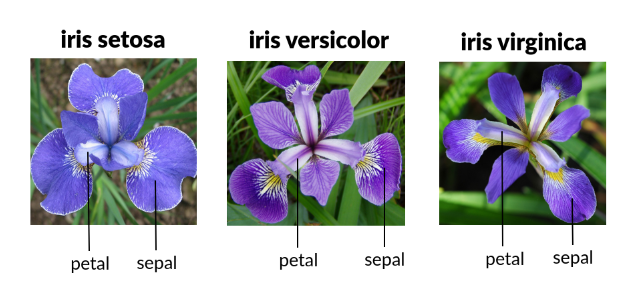

In [71]:
from IPython import display
display.Image("Iris.png")

Data Analysis

In [72]:
data.shape

(150, 6)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<AxesSubplot:ylabel='Species'>

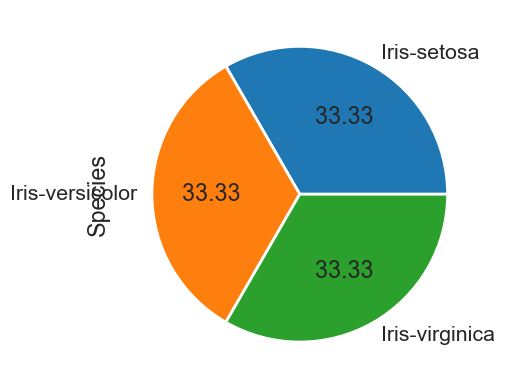

In [74]:
# Visualization in form of pie chart
data['Species'].value_counts().plot(kind='pie',autopct='%.2f')

Data Preprocessing

In [75]:
print("null values\n",data.isnull().sum())
print("duplicate values: ",data.duplicated().sum())

null values
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
duplicate values:  0


In [76]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [77]:
mapspecies={'Iris-setosa':0, 'Iris-versicolor':1,'Iris-virginica':2}
data['Species']=data['Species'].map(mapspecies)


In [102]:
print(data.head())
print(data[53:])

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
53    54            5.5           2.3            4.0           1.3        1
54    55            6.5           2.8            4.6           1.5        1
55    56            5.7           2.8            4.5           1.3        1
56    57            6.3           3.3            4.7           1.6        1
57    58            4.9           2.4            3.3           1.0        1
..   ...            ...           ...            ...           ...      ...
145  146            6.7       

In [79]:
x=data[['SepalWidthCm','SepalLengthCm','PetalLengthCm','PetalWidthCm']].values
y=data[['Species']].values
Reshaped_y=y.reshape(150,)
print(x[:5])
print(y[:5])

[[3.5 5.1 1.4 0.2]
 [3.  4.9 1.4 0.2]
 [3.2 4.7 1.3 0.2]
 [3.1 4.6 1.5 0.2]
 [3.6 5.  1.4 0.2]]
[[0]
 [0]
 [0]
 [0]
 [0]]


Model Building

Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [81]:
expected=y
print(expected[:6])


[[0]
 [0]
 [0]
 [0]
 [0]
 [0]]


Logistic Model Prediction

In [82]:
predicted = model_lr.predict(x)
print(predicted)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Logistic Model Evaluation

In [83]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [84]:
accuracy_score(expected,predicted)

0.9733333333333334

In [85]:
print(Reshaped_y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [86]:
print(x.shape)
print(y.shape)
print(Reshaped_y.shape)

(150, 4)
(150, 1)
(150,)


SVM

In [87]:
from sklearn.svm import SVC

model_svm=SVC()
model_svm.fit(x,y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [88]:

# Predict from the test dataset
prediction = model_svm.predict(x)


In [89]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

SVM Model Evaluation

In [90]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(metrics.classification_report(Reshaped_y, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [91]:
accuracy_score(Reshaped_y,prediction)

0.9733333333333334

In [92]:
print(metrics.confusion_matrix(Reshaped_y,prediction))

[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]


In [96]:
#sepal_length = float(request.form['sepal_length'])
#sepal_width = float(request.form['sepal_width'])
#petal_length = float(request.form['petal_length'])
#petal_width = float(request.form['petal_width'])

# Make prediction
prediction = model_lr.predict([[4.4,3.2,1.3,0.2]])
print(prediction)
# Convert prediction to human-readable species
species = 'Setosa' if prediction == 0 else 'Versicolor' if prediction == 1 else 'Virginica'
species

[0]


'Setosa'

In [97]:
# Make prediction
prediction = model_lr.predict([[5.7,2.5,5,2]])
print(prediction)
# Convert prediction to human-readable species
species = 'Setosa' if prediction == 0 else 'Versicolor' if prediction == 1 else 'Virginica'
species

[2]


'Virginica'